In [1]:
# Generic inputs for most ML tasks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

pd.options.display.float_format = '{:,.2f}'.format

# setup interactive notebook mode
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import display, HTML

#### Read and pre-process data

In [2]:
# fetch data 

ht_wt = pd.read_csv('weight-height.csv')

ht_wt.head()

,Gender,Height,Weight
0,Male,73.85,241.89
1,Male,68.78,162.31
2,Male,74.11,212.74
3,Male,71.73,220.04
4,Male,69.88,206.35


In [3]:
Kval = 5 # Number of clusters

ht_wt.isna().sum()


Gender    0
Height    0
Weight    0
dtype: int64

In [4]:
# define function to import viz libraries
import plotly
plotly.offline.init_notebook_mode(connected=True)
from plotly.graph_objs import *
from plotly import tools
import plotly.graph_objects as go
import seaborn as sns

In [5]:
# correl = subset_data.corr()
correl = ht_wt.corr()

trace = go.Heatmap(z=correl.values,
                  x=correl.index.values,
                  y=correl.columns.values)
data=[trace]
plotly.offline.iplot(data, filename='basic-heatmap')

ValueError: could not convert string to float: 'Male'

In [ ]:
ht_wt.columns

In [6]:
female_data = ht_wt[ht_wt['Gender'] == 'Female']
male_data = ht_wt[ht_wt['Gender'] == 'Male']

In [7]:
cols = ['Height', 'Weight']
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
subset_f_data = pd.DataFrame(sc.fit_transform(female_data[cols]), columns = female_data[cols].columns, index = female_data.index)
subset_m_data = pd.DataFrame(sc.fit_transform(male_data[cols]), columns = male_data[cols].columns, index = male_data.index)

In [8]:
subset_f_data.head()
subset_m_data.head()

,Height,Weight
5000,-1.78,-1.78
5001,0.56,0.29
5002,-0.13,-0.25
5003,0.29,-0.40
5004,-0.71,-0.32


,Height,Weight
0,1.68,2.77
1,-0.09,-1.25
2,1.78,1.30
3,0.94,1.67
4,0.30,0.98


In [12]:
from sklearn.cluster import KMeans

km_f = KMeans(n_clusters = Kval, 
           init = 'random', 
           n_init = 10, 
           max_iter = 500, 
           tol = 1e-04, 
           random_state = 50)
data_km_f = pd.DataFrame(km_f.fit_predict(subset_f_data), index = subset_f_data.index)

km_m = KMeans(n_clusters = Kval, 
           init = 'random', 
           n_init = 10, 
           max_iter = 500, 
           tol = 1e-04, 
           random_state = 50)
data_km_m = pd.DataFrame(km_m.fit_predict(subset_m_data), index = subset_m_data.index)

In [13]:
data_km_f.head()
data_km_m.head()

,0
5000,4
5001,3
5002,0
5003,0
5004,1


,0
0,1
1,0
2,1
3,1
4,4


In [14]:
data_km_f.rename(columns = {0:'cluster'}, inplace = True)
data_km_m.rename(columns = {0:'cluster'}, inplace = True)

data_km_f = data_km_f.merge(female_data[cols], left_index = True, right_index = True)
data_km_m = data_km_m.merge(male_data[cols], left_index = True, right_index = True)
data_km_f.head()
data_km_m.head()

,cluster,Height,Weight
5000,4,58.91,102.09
5001,3,65.23,141.31
5002,0,63.37,131.04
5003,0,64.48,128.17
5004,1,61.79,129.78


,cluster,Height,Weight
0,1,73.85,241.89
1,0,68.78,162.31
2,1,74.11,212.74
3,1,71.73,220.04
4,4,69.88,206.35


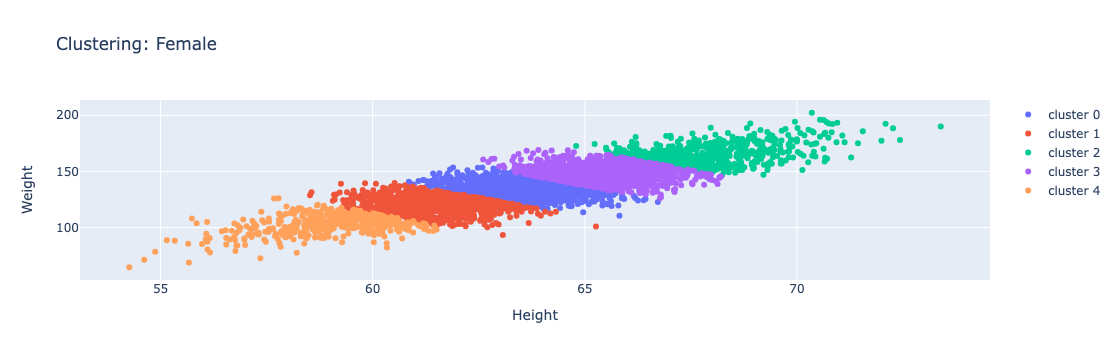

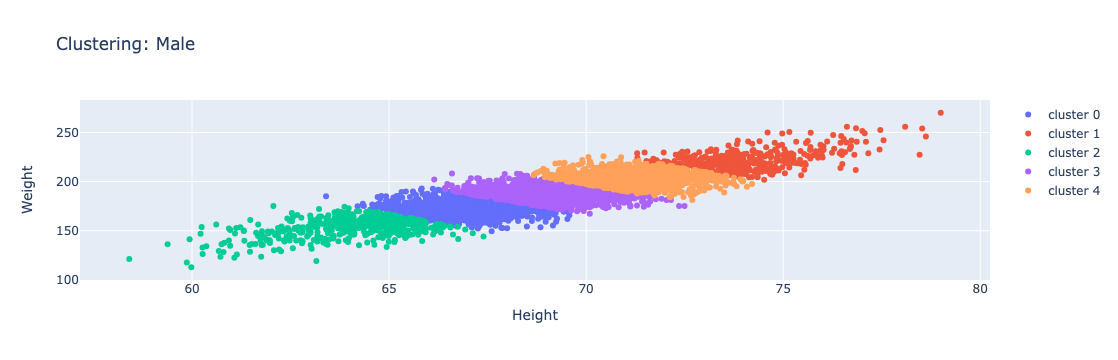

In [15]:
for gen in ['f', 'm']:
    data_km = []
    plot_data = []
    if gen == 'f':
        data_km = data_km_f.copy()
    else:
        data_km = data_km_m.copy()
    for clus in set(data_km['cluster']):
        df = data_km[data_km['cluster'] == clus]
        plot_data.append(go.Scatter(x= df['Height'], y= df['Weight'], name = 'cluster ' + str(clus), mode = 'markers'))

    if gen == 'f':
        layout = go.Layout(xaxis = dict(title='Height'), yaxis = dict(title= 'Weight'), 
                   title = 'Clustering: Female')
    else:
        layout = go.Layout(xaxis = dict(title='Height'), yaxis = dict(title= 'Weight'), 
                   title = 'Clustering: Male')
    
    fig = go.Figure(data= plot_data, layout=layout)
    plotly.offline.iplot(fig)
    
    

# plt.plot(data_km['cluster'],data_km['rating'], 'ro', alpha = 0.5)
# for i in range(len(data_km)):
#     plt.text(data_km.loc[i]['cluster'], data_km.loc[i]['rating'], str(i)) # cereal_data['name']) # 

# plt.show()

KMeans(max_iter=500, n_clusters=2, n_init=10, random_state=50)

KMeans(max_iter=500, n_clusters=3, n_init=10, random_state=50)

KMeans(max_iter=500, n_clusters=4, n_init=10, random_state=50)

KMeans(max_iter=500, n_clusters=5, n_init=10, random_state=50)

KMeans(max_iter=500, n_clusters=6, n_init=10, random_state=50)

KMeans(max_iter=500, n_clusters=7, n_init=10, random_state=50)

KMeans(max_iter=500, n_init=10, random_state=50)

KMeans(max_iter=500, n_clusters=9, n_init=10, random_state=50)

KMeans(max_iter=500, n_clusters=10, n_init=10, random_state=50)

Text(0.5, 0, 'Number of Female Clusters')

Text(0, 0.5, 'Distortion')

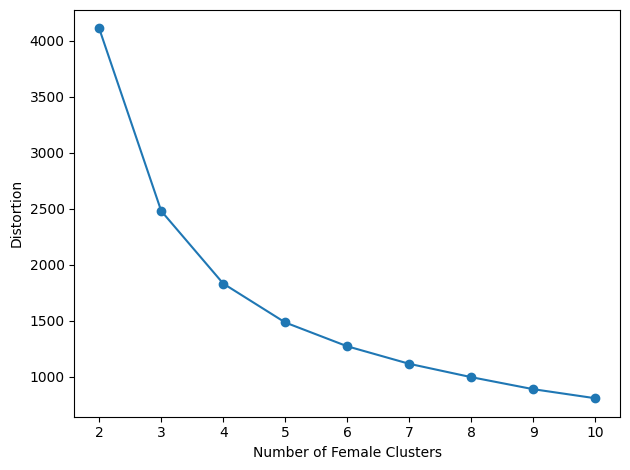

In [17]:
distortions = []
for i in range(2, 11): 
    km = KMeans(n_clusters = i, 
           init = 'k-means++', # this initializes by placing the initial ones randomly and uniformly in grid
           n_init = 10, 
           max_iter = 500, 
           # tol = 1e-04, 
           random_state = 50)
    km.fit(subset_f_data)
    distortions.append(km.inertia_)
plt.plot(range(2,11), distortions, marker = 'o')
plt.xlabel('Number of Female Clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

In [ ]:
distortions = []
for i in range(2, 11): 
    km = KMeans(n_clusters = i, 
           init = 'k-means++', # this initializes by placing the initial ones randomly and uniformly in grid
           n_init = 10, 
           max_iter = 500, 
           # tol = 1e-04, 
           random_state = 50)
    km.fit(subset_m_data)
    distortions.append(km.inertia_)
plt.plot(range(2,11), distortions, marker = 'o')
plt.xlabel('Number of Male Clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()